In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the sales data from sales1.csv
df = pd.read_csv("C:/Users/HP/Documents/Task/sales_data_1.csv")
df

,Date,Firm bought from,Buying price,Customer,Selling price,Quantity sold
0,21/08/23,Vendor6,72.11,Customer7,91.58,44
1,21/08/23,Vendor4,75.08,Customer7,83.71,17
2,21/08/23,Vendor7,83.93,Customer2,103.76,15
3,21/08/23,Vendor7,52.01,Customer3,64.53,7
4,21/08/23,Vendor2,98.91,Customer5,140.92,1
...,...,...,...,...,...,...
65,27/08/23,Vendor4,64.82,Customer6,87.45,18
66,27/08/23,Vendor8,88.79,Customer3,105.59,5
67,27/08/23,Vendor5,63.30,Customer5,92.92,32
68,27/08/23,Vendor5,94.06,Customer5,125.67,4


In [3]:
# 1. Calculate overall gross margin
overall_gross_margin = ((df['Selling price'] - df['Buying price']).sum() / df['Selling price'].sum()) * 100

In [4]:
# 2. Calculate the average gross margin for each vendor
vendor_avg_margin= df.groupby('Firm bought from')['Selling price', 'Buying price'].apply(lambda x: ((x['Selling price'] - x['Buying price']).sum() / x['Selling price'].sum()) * 100).reset_index()
vendor_avg_margin 

C:\Users\HP\AppData\Local\Temp\ipykernel_10864\1144434916.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  vendor_avg_margin= df.groupby('Firm bought from')['Selling price', 'Buying price'].apply(lambda x: ((x['Selling price'] - x['Buying price']).sum() / x['Selling price'].sum()) * 100).reset_index()


,Firm bought from,0
0,Vendor1,21.327831
1,Vendor10,25.009843
2,Vendor2,23.012427
3,Vendor3,26.788408
4,Vendor4,22.948144
5,Vendor5,22.169579
6,Vendor6,21.141691
7,Vendor7,21.342516
8,Vendor8,17.670961
9,Vendor9,27.511695


In [5]:
vendor_avg_margin.columns = ['Firm bought from','Selling price']
most_profitable_vendor = vendor_avg_margin.loc[df['Selling price'].idxmax()]
most_profitable_vendor

Firm bought from      Vendor7
Selling price       21.342516
Name: 7, dtype: object

In [8]:
# 3. Calculate the average gross margin for each customer
customer_avg_margin= df.groupby('Quantity sold')['Selling price', 'Buying price'].apply(lambda x: ((x['Selling price'] - x['Buying price']).sum() / x['Selling price'].sum()) * 100).reset_index()
customer_avg_margin
#print(vendor_avg_margin.columns)

C:\Users\HP\AppData\Local\Temp\ipykernel_10864\992751926.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  customer_avg_margin= df.groupby('Quantity sold')['Selling price', 'Buying price'].apply(lambda x: ((x['Selling price'] - x['Buying price']).sum() / x['Selling price'].sum()) * 100).reset_index()


,Quantity sold,0
0,1,26.856821
1,2,11.064252
2,3,12.878722
3,4,25.339674
4,5,15.910598
5,6,30.477883
6,7,23.020967
7,8,22.775490
8,9,27.087472
9,11,18.112589


In [9]:
customer_avg_margin.columns = ['Quantity sold','Selling price']
least_profitable_customer = customer_avg_margin.loc[customer_avg_margin['Selling price'].idxmin()]
least_profitable_customer
#least_profitable_customer_idx = df.groupby('Quantity sold').apply(lambda x: ((x['Selling price'] - x['Buying price']).sum() / x['Selling price'].sum()) * 100).idxmin()
#least_profitable_customer = df.loc[least_profitable_customer_idx]


Quantity sold    16.000000
Selling price     9.321497
Name: 13, dtype: float64

In [10]:
# 4. Calculate the average gross margin for each day of the week
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['Date'].dt.day_name()
day_of_week_avg_margin= df.groupby('day_of_week')['Selling price', 'Buying price'].apply(lambda x: ((x['Selling price'] - x['Buying price']).sum() / x['Selling price'].sum()) * 100).reset_index()
day_of_week_avg_margin

C:\Users\HP\AppData\Local\Temp\ipykernel_10864\485611595.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  day_of_week_avg_margin= df.groupby('day_of_week')['Selling price', 'Buying price'].apply(lambda x: ((x['Selling price'] - x['Buying price']).sum() / x['Selling price'].sum()) * 100).reset_index()


,day_of_week,0
0,Friday,26.406872
1,Monday,23.458336
2,Saturday,23.065248
3,Sunday,23.536117
4,Thursday,23.325404
5,Tuesday,20.574312
6,Wednesday,23.786308


In [11]:

day_of_week_avg_margin.columns = ['day_of_week','Selling price']
most_profitable_day = day_of_week_avg_margin.loc[day_of_week_avg_margin['Selling price'].idxmax()]


In [12]:
# 5. Calculate the average gross margin for each day of the week
least_profitable_day = day_of_week_avg_margin.loc[day_of_week_avg_margin['Selling price'].idxmin()]

In [16]:
# Print the results
print("1. Overall Gross Margin: {:.2f}%".format(overall_gross_margin))
print("2. Most Profitable Vendor: {} with a gross margin of {:.2f}%".format(most_profitable_vendor['Firm bought from'], most_profitable_vendor['Selling price']))
print("3. Least Profitable Customer: {} with a gross margin of {:.2f}%".format(least_profitable_customer['Quantity sold'], least_profitable_customer['Selling price']))
print("4. Most Profitable Day of the Week: {} with a gross margin of {:.2f}%".format(most_profitable_day['day_of_week'], most_profitable_day['Selling price']))
print("5. Least Profitable Day of the Week: {} with a gross margin of {:.2f}%".format(least_profitable_day['day_of_week'], least_profitable_day['Selling price']))

1. Overall Gross Margin: 23.33%
2. Most Profitable Vendor: Vendor7 with a gross margin of 21.34%
3. Least Profitable Customer: 16.0 with a gross margin of 9.32%
4. Most Profitable Day of the Week: Friday with a gross margin of 26.41%
5. Least Profitable Day of the Week: Tuesday with a gross margin of 20.57%


In [17]:
df2=pd.read_csv("C:/Users/HP/Documents/Task/sales_data_2.csv")
df2

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1
...,...,...,...,...,...,...,...
65,2023-08-27,Vendor4,64.82,28,Customer6,87.45,18
66,2023-08-27,Vendor8,88.79,14,Customer3,105.59,5
67,2023-08-27,Vendor5,63.30,81,Customer5,92.92,32
68,2023-08-27,Vendor5,94.06,18,Customer5,125.67,4


In [19]:
#6. Can you calculate a 3-day average of the daily gross profit from the sales_data_2 csv?
# Calculate daily gross profit
df2['gross_profit'] = df2['Selling price'] - df2['Buying price']

# Calculate 3-day rolling average of daily gross profit
df2['3_day_avg_gross_profit'] = df2['gross_profit'].rolling(window=3).mean()

# Print the resulting DataFrame with the 3-day average of daily gross profit
print(df2[['Date', 'gross_profit', '3_day_avg_gross_profit']])

          Date  gross_profit  3_day_avg_gross_profit
0   2023-08-21         19.47                     NaN
1   2023-08-21          8.63                     NaN
2   2023-08-21         19.83               15.976667
3   2023-08-21         12.52               13.660000
4   2023-08-21         42.01               24.786667
..         ...           ...                     ...
65  2023-08-27         22.63               20.686667
66  2023-08-27         16.80               22.173333
67  2023-08-27         29.62               23.016667
68  2023-08-27         31.61               26.010000
69  2023-08-27         25.88               29.036667

[70 rows x 3 columns]


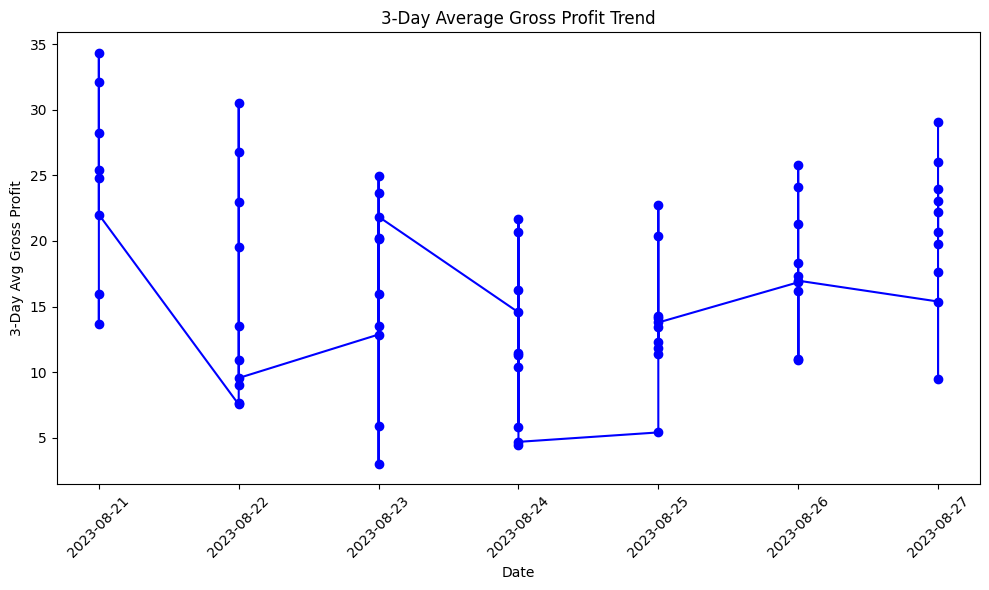

In [21]:
import matplotlib.pyplot as plt

# Plotting the 3-day average gross profit trend
plt.figure(figsize=(10, 6))
plt.plot(df2['Date'], df2['3_day_avg_gross_profit'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('3-Day Avg Gross Profit')
plt.title('3-Day Average Gross Profit Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
# Calculate the profit
df2['Profit'] = (df2['Selling price'] - df2['Buying price']) * df2['Quantity sold']
vendor_avg_profit = df2.groupby('Firm bought from')['Profit'].mean()
underperforming_vendors = vendor_avg_profit[vendor_avg_profit < 100]
underperforming_vendors

Firm bought from
Vendor8    84.58
Name: Profit, dtype: float64

In [32]:
customer_avg_profit = df2.groupby('Customer')['Profit'].mean()
customer_avg_profit

Customer
Customer1     885.095000
Customer10    738.488000
Customer2     421.567000
Customer3     150.721429
Customer4     556.228333
Customer5     187.897143
Customer6     275.822857
Customer7     313.945714
Customer8     649.891000
Customer9     385.816000
Name: Profit, dtype: float64

In [34]:
# Define a threshold for low gross margin
vendor_margin_threshold = 10  # You can adjust this threshold as needed
customer_margin_threshold = 5  # You can adjust this threshold as needed

# Identify vendors and customers with consistently low gross margins
low_margin_vendors = vendor_avg_profit[vendor_avg_profit < vendor_margin_threshold]
low_margin_customers = customer_avg_profit[customer_avg_profit < customer_margin_threshold]

# Print the vendors and customers to consider discontinuing
print("Vendors with consistently low gross margins:")
print(low_margin_vendors)

print("\nCustomers with consistently low gross margins:")
print(low_margin_customers)

Vendors with consistently low gross margins:
Series([], Name: Profit, dtype: float64)

Customers with consistently low gross margins:
Series([], Name: Profit, dtype: float64)


In [28]:
# Calculate percentiles for buying and selling prices
buying_price_percentiles = np.percentile(df2['Buying price'], [25, 50, 75, 85])
selling_price_percentiles = np.percentile(df2['Selling price'], [25, 50, 75, 85])

# Print the percentiles
print("Buying Price Percentiles (25th, 50th, 75th, 85th):", buying_price_percentiles)
print("Selling Price Percentiles (25th, 50th, 75th, 85th):", selling_price_percentiles)

Buying Price Percentiles (25th, 50th, 75th, 85th): [29.9   60.76  78.32  88.671]
Selling Price Percentiles (25th, 50th, 75th, 85th): [ 38.975   78.99   103.3975 112.817 ]


In [35]:
# Assuming Vendor 4's pricing and cost data is available
vendor_4_cost_price = 64.82  # Example cost price from Vendor 4
vendor_4_selling_price = 87.45  # Example selling price to customers for Vendor 4

# Current gross margin calculation (before honoring Vendor 4)
current_cost_price = df2['Buying price'].mean()  # Average cost price from all vendors
current_selling_price = df2['Selling price'].mean()  # Average selling price to customers from all vendors
current_gross_margin = ((current_selling_price - current_cost_price) / current_selling_price) * 100

In [36]:
# New gross margin calculation (after honoring Vendor 4)
new_gross_margin = ((vendor_4_selling_price - vendor_4_cost_price) / vendor_4_selling_price) * 100

# Calculate the impact on gross margin
margin_impact = new_gross_margin - current_gross_margin

# Print the impact on gross margin
print("Impact on Gross Margin after Honoring Vendor 4: {:.2f}%".format(margin_impact))


Impact on Gross Margin after Honoring Vendor 4: 2.55%


In [37]:
# Calculate gross profit for each vendor
df2['gross_profit'] = df2['Selling price'] - df2['Buying price']
vendor_gross_margin = df2.groupby('Firm bought from')['gross_profit'].mean()

In [38]:
# Find the vendor with the highest gross margin
max_margin_vendor = vendor_gross_margin.idxmax()
max_margin_value = vendor_gross_margin.max()

In [39]:
# Calculate the theoretical maximum margin for that vendor
theoretical_max_margin = (max_margin_value / df2['Selling price'].mean()) * 100

In [40]:
# Print the results
print("Vendor with the Highest Gross Margin: {}".format(max_margin_vendor))
print("Theoretical Maximum Margin: {:.2f}%".format(theoretical_max_margin))

Vendor with the Highest Gross Margin: Vendor9
Theoretical Maximum Margin: 37.26%


In [41]:
# Calculate total sales for the branch
total_sales = df2['Quantity sold'].sum()

# Calculate average selling price and total revenue before price change
average_price_before = df2['Selling price'].mean()
total_revenue_before = total_sales * average_price_before


In [42]:
# Increase the price by Rs. 1 and calculate total revenue after the price increase
average_price_after_increase = average_price_before + 1
total_revenue_after_increase = total_sales * average_price_after_increase


In [43]:
# Decrease the price by Rs. 1 and calculate total revenue after the price decrease
average_price_after_decrease = average_price_before - 1
total_revenue_after_decrease = total_sales * average_price_after_decrease


In [44]:
# Calculate percentage change in price and quantity demanded
percentage_change_in_price_increase = 1 / average_price_before * 100
percentage_change_in_price_decrease = -1 / average_price_before * 100
percentage_change_in_quantity_demanded_increase = (total_revenue_after_increase - total_revenue_before) / total_revenue_before * 100
percentage_change_in_quantity_demanded_decrease = (total_revenue_after_decrease - total_revenue_before) / total_revenue_before * 100


In [45]:
# Calculate price elasticity
price_elasticity_increase = percentage_change_in_quantity_demanded_increase / percentage_change_in_price_increase
price_elasticity_decrease = percentage_change_in_quantity_demanded_decrease / percentage_change_in_price_decrease

In [46]:
# Print the results
print("Price Elasticity (If price increases by Rs. 1): {:.2f}".format(price_elasticity_increase))
print("Price Elasticity (If price decreases by Rs. 1): {:.2f}".format(price_elasticity_decrease))

Price Elasticity (If price increases by Rs. 1): 1.00
Price Elasticity (If price decreases by Rs. 1): 1.00
